### Visualize CCGP of confidence across Stimulus Onset. 
Done for pairs of features

In [15]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
import utils.stats_utils as stats_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_9_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_unit

100%|██████████| 1000/1000 [00:01<00:00, 526.12it/s]


{'within cond.': (0, 0.7520707485373908), 'within cond. shuffle': (1, 0.5622952166646802), 'across cond.': (2, 0.7143003630721202), 'across cond. shuffle': (3, 0.5238929719808879)}
0.7520707485373908
0.03760353742686954


100%|██████████| 1000/1000 [00:04<00:00, 214.22it/s]


0
1
text y pos: 0.7934346397069472


100%|██████████| 1000/1000 [00:01<00:00, 524.61it/s]


{'within cond.': (0, 0.7520707485373908), 'within cond. shuffle': (1, 0.5622952166646802), 'across cond.': (2, 0.7143003630721202), 'across cond. shuffle': (3, 0.5238929719808879)}
0.7520707485373908
0.03760353742686954


100%|██████████| 1000/1000 [00:04<00:00, 213.19it/s]


2
3
text y pos: 0.7934346397069472


(<Figure size 1000x500 with 2 Axes>,
 (<Axes: ylabel='Accuracy'>,
  <Axes: xlabel='Time to cards appear (s)', ylabel='Accuracy'>))

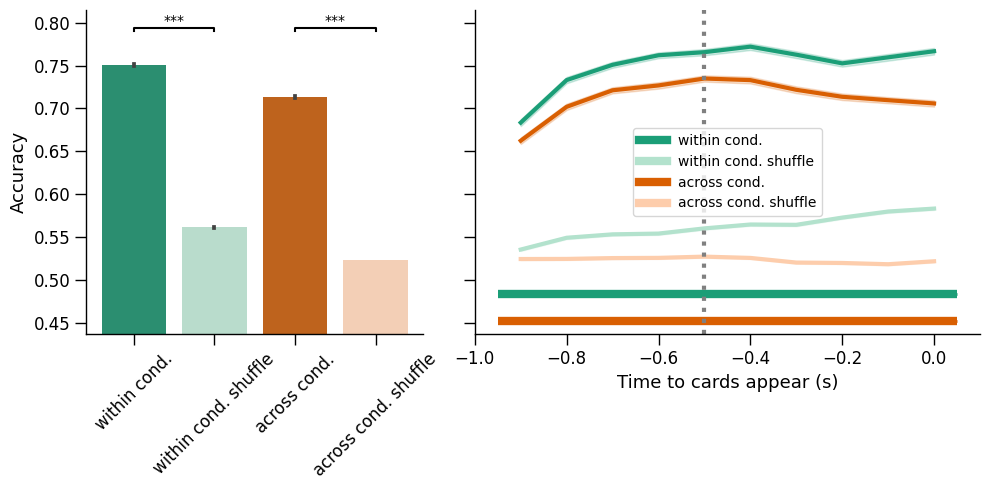

In [29]:
PAIRS_PATH = "/data/patrick_res/sessions/both/pairs_at_least_3blocks_10sess.pickle"

pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "both"
args.mode = "feat_belief"
args.base_output_path = "/data/patrick_res/ccgp_conf"
args.sig_unit_level = "pref_conf_99th_window_filter_drift"
# args.beh_filters = {"Response": "Correct", "Choice": "Chose"}


res = belief_partitions_io.read_ccgp_results(args, pairs, conds=["within_cond", "across_cond"])
res = res[res.Time <= 0]
res = res.sort_values(by="condition", key=lambda x: x.map(list(visualization_utils.CCGP_COND_TO_DISPLAY_NAMES.keys()).index))
sig_pairs = [("within cond.", "within cond. shuffle", "#1b9e77"), ("across cond.", "across cond. shuffle", "#d95f02")]
# sig_pairs = [("within cond.", "within cond. shuffle", "#1b9e77")]
visualization_utils.visualize_bars_time(args, res, y_lims=(0.5, None), sig_pairs=sig_pairs)

In [14]:
res

,Time,run,Accuracy,dim_type,pair_str,condition
0,-0.9,0,0.5775,within dim,CIRCLE_SQUARE,within cond.
1,-0.8,0,0.7925,within dim,CIRCLE_SQUARE,within cond.
2,-0.7,0,0.6500,within dim,CIRCLE_SQUARE,within cond.
3,-0.6,0,0.7750,within dim,CIRCLE_SQUARE,within cond.
4,-0.5,0,0.6975,within dim,CIRCLE_SQUARE,within cond.
...,...,...,...,...,...,...
305,-0.4,15,0.5550,within dim,POLKADOT_SWIRL,across cond. shuffle
306,-0.3,15,0.5275,within dim,POLKADOT_SWIRL,across cond. shuffle
307,-0.2,15,0.4925,within dim,POLKADOT_SWIRL,across cond. shuffle
308,-0.1,15,0.4500,within dim,POLKADOT_SWIRL,across cond. shuffle


In [7]:
from matplotlib.colors import to_hex

# cmap = plt.get_cmap("Dark2")
cmap = plt.get_cmap("Pastel2")

# Convert all 20 RGBA colors to hex
colors_hex = [to_hex(cmap(i)) for i in range(cmap.N)]

print(colors_hex)

['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']


In [3]:
pairs

,pair,sessions,num_sessions,dim_type,n_units
0,"[CIRCLE, SQUARE]","[20180615, 20180709, 20180802, 20180803, 20180...",14,within dim,415
1,"[CIRCLE, STAR]","[20180709, 20180803, 20180821, 20180911, 20180...",12,within dim,297
2,"[CIRCLE, GREEN]","[20180802, 20180806, 20180808, 20180813, 20180...",11,across dim,303
3,"[CIRCLE, MAGENTA]","[20180802, 20180803, 20180806, 20180808, 20180...",10,across dim,280
4,"[CIRCLE, YELLOW]","[20180802, 20180810, 20180813, 20180821, 20180...",14,across dim,351
5,"[CIRCLE, RIPPLE]","[20180615, 20180802, 20180803, 20180810, 20180...",10,across dim,269
6,"[SQUARE, CYAN]","[20180801, 20180802, 20180803, 20180820, 20180...",12,across dim,355
7,"[SQUARE, GREEN]","[20180802, 20180806, 20180808, 20180830, 20180...",10,across dim,273
8,"[SQUARE, MAGENTA]","[20180801, 20180802, 20180803, 20180806, 20180...",13,across dim,354
9,"[SQUARE, YELLOW]","[20180801, 20180802, 20180810, 20180820, 20180...",13,across dim,339


### by region

Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_within_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_9_within_cond_accs.npy
Warning, shuffle not foun

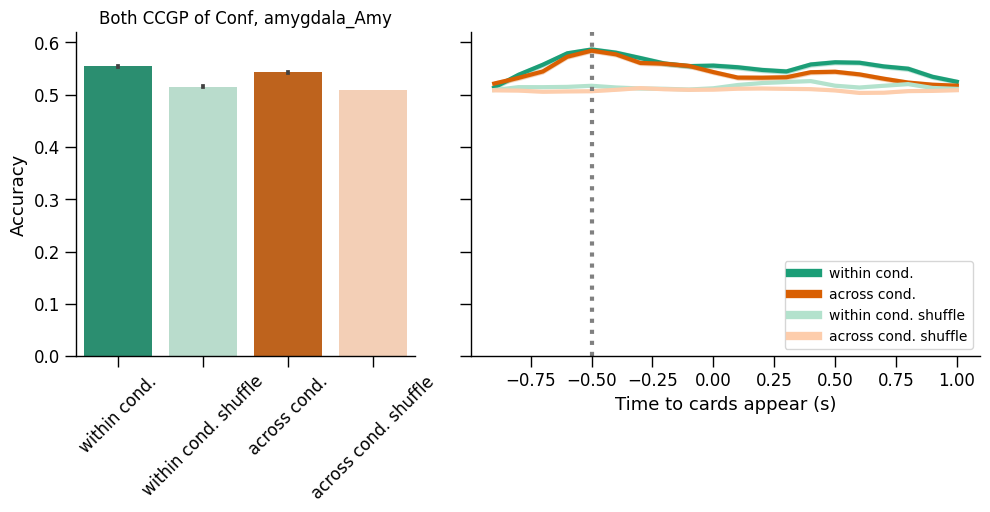

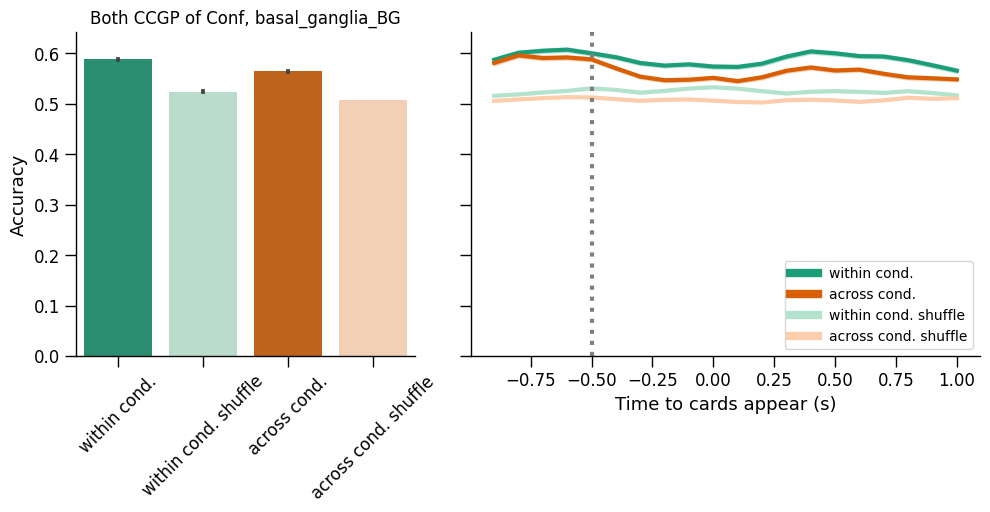

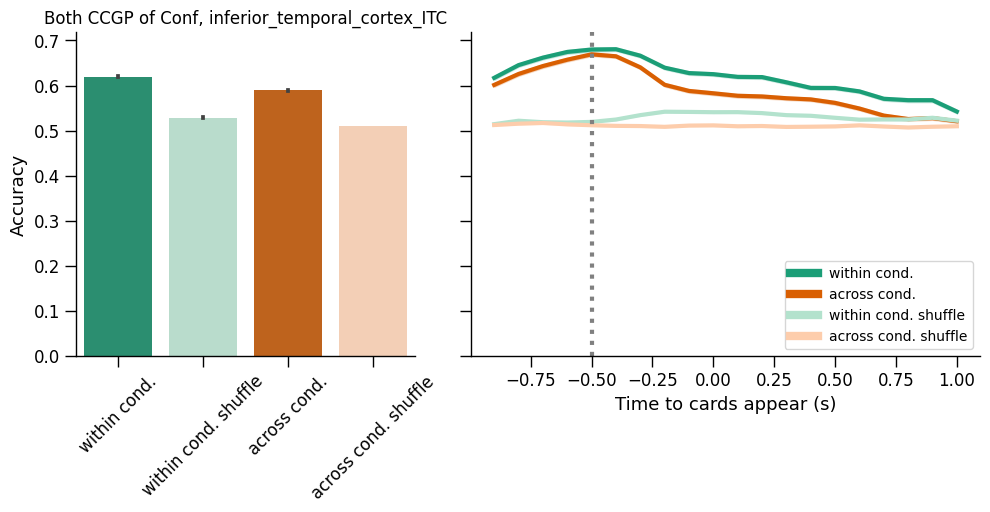

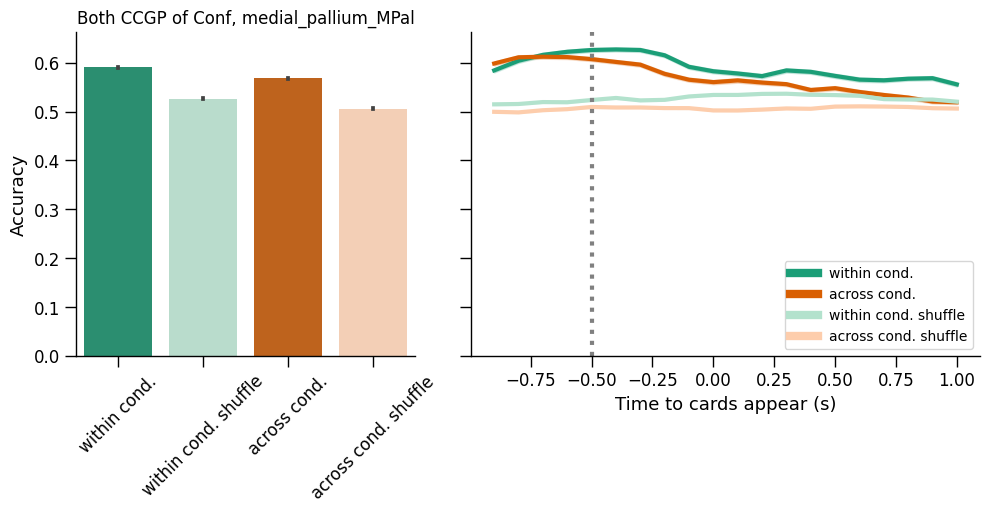

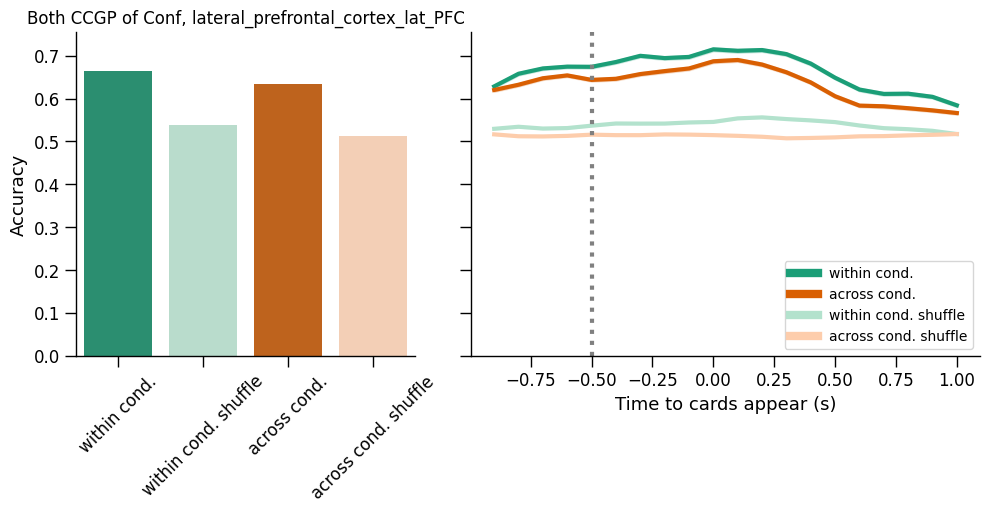

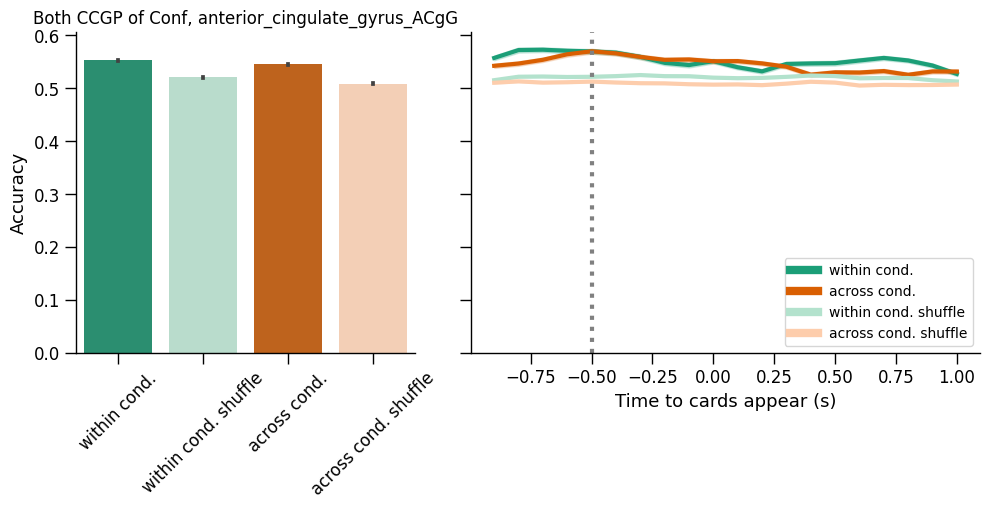

In [10]:
PAIRS_PATH = "/data/patrick_res/sessions/both/pairs_at_least_3blocks_10sess.pickle"
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)

for region in REGIONS_OF_INTEREST:
    args = argparse.Namespace(
        **BeliefPartitionConfigs()._asdict()
    )
    args.subject = "both"
    args.mode = "feat_belief"
    args.base_output_path = "/data/patrick_res/ccgp_conf"
    args.sig_unit_level = "pref_conf_99th_window_filter_drift"
    args.region_level = "structure_level2_cleaned"
    args.regions = region
    # args.beh_filters = {"Response": "Correct", "Choice": "Chose"}

    res = res = belief_partitions_io.read_ccgp_results(args, pairs, conds=["within_cond", "across_cond"])

    fig, axs = visualization_utils.visualize_bars_time(args, res)
    axs[0].set_title(f"Both CCGP of Conf, {region}")

### by within/across dims

In [4]:
PAIRS_PATH = "/data/patrick_res/sessions/both/pairs_at_least_3blocks_10sess.pickle"

pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "both"
args.mode = "feat_belief"
args.base_output_path = "/data/patrick_res/ccgp_conf"
args.sig_unit_level = "pref_conf_99th_window_filter_drift"
# args.beh_filters = {"Response": "Correct", "Choice": "Chose"}


Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_9_across_cond_accs.npy


<Axes: xlabel='Time', ylabel='Accuracy'>

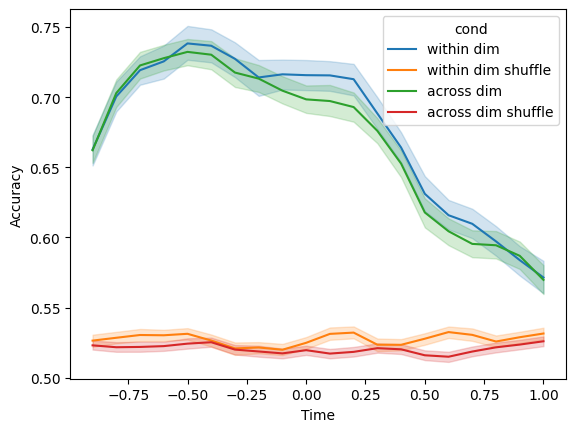

In [5]:
# pairs[pairs.dim_type == "within_dim"]
within_res = belief_partitions_io.read_ccgp_results(args, pairs[pairs.dim_type == "within dim"], conds=["across_cond"])
within_res["cond"] = within_res.condition.apply(lambda x: "within dim shuffle" if "shuffle" in x else "within dim")
across_res = belief_partitions_io.read_ccgp_results(args, pairs[pairs.dim_type == "across dim"], conds=["across_cond"])
across_res["cond"] = across_res.condition.apply(lambda x: "across dim shuffle" if "shuffle" in x else "across dim")
all_res = pd.concat((within_res, across_res))
sns.lineplot(all_res, x="Time", y="Accuracy", hue="cond")


In [6]:
all_res["TimeIdx"] = (all_res.Time * 10).astype(int)
all_res_true = all_res[all_res.cond.isin(("within dim", "across dim"))]
all_res_true = all_res_true[all_res_true.TimeIdx < 0]

In [7]:
sigs = all_res_true.groupby(["TimeIdx"]).apply(lambda x: stats_utils.compute_p_per_group(x, val_col="Accuracy", label_col="cond", label_a="within dim", label_b="across dim"))

 86%|████████▌ | 858/1000 [00:00<00:00, 1423.25it/s]

100%|██████████| 1000/1000 [00:00<00:00, 1430.20it/s]


In [8]:
sigs

TimeIdx
-9    0.457
-8    0.620
-7    0.674
-6    0.604
-5    0.211
-4    0.230
-3    0.133
-2    0.471
-1    0.066
dtype: float64

### within/across dim by regions: 

Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_basal_ganglia_BG_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_9_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_inferior_temporal_cortex_ITC_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_3_across_cond_accs.npy
Warning, shuffle not found: /data/patrick_res/ccgp_conf/both_StimOnset_inferior_temporal_cortex_ITC_pref_conf_99th_window_filter_drift_units/shuffles/CIRCLE_RIPPLE_feat_belief_shuffle_4_across_cond_accs.npy
W

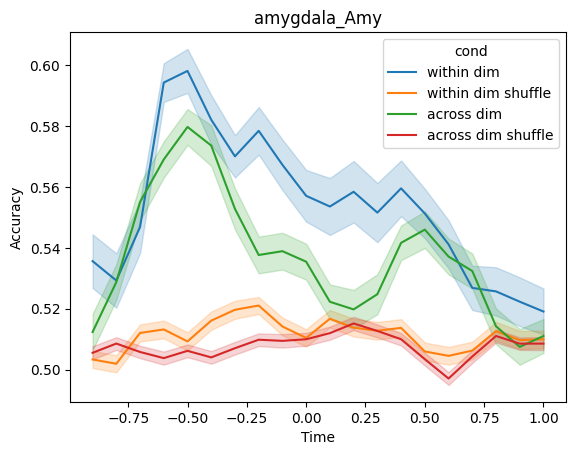

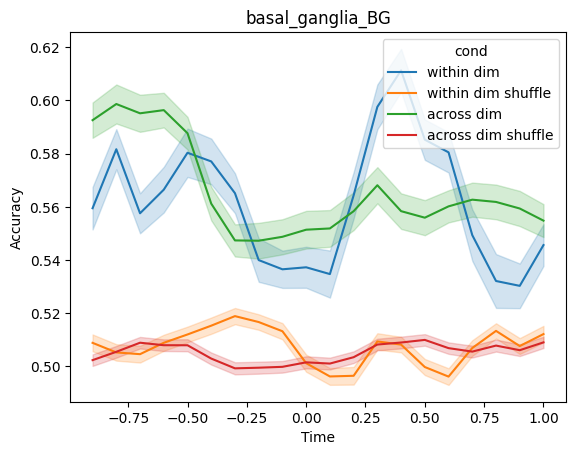

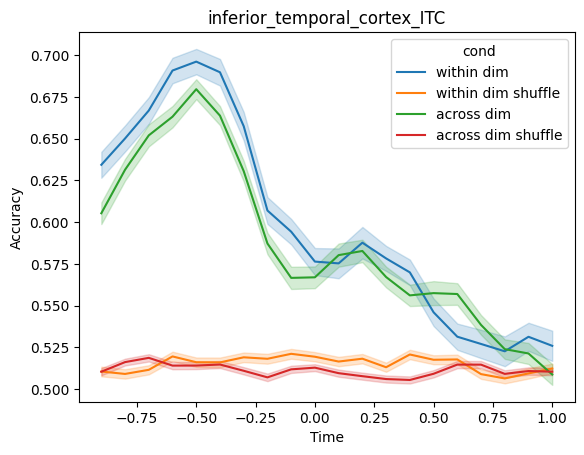

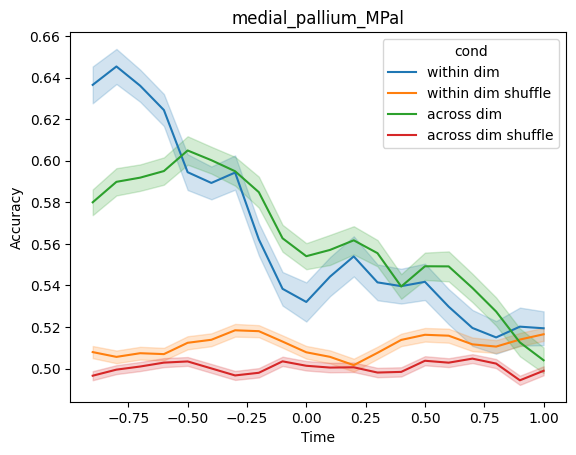

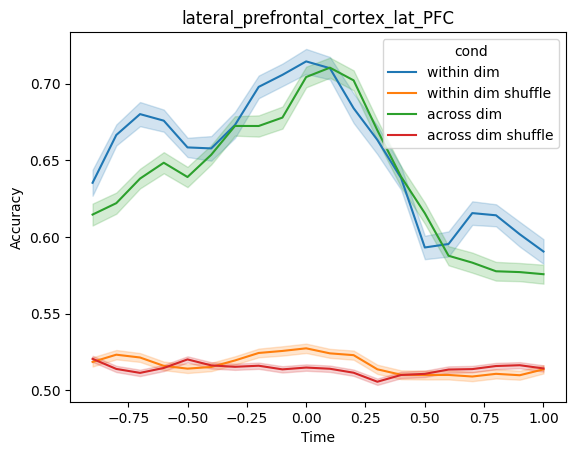

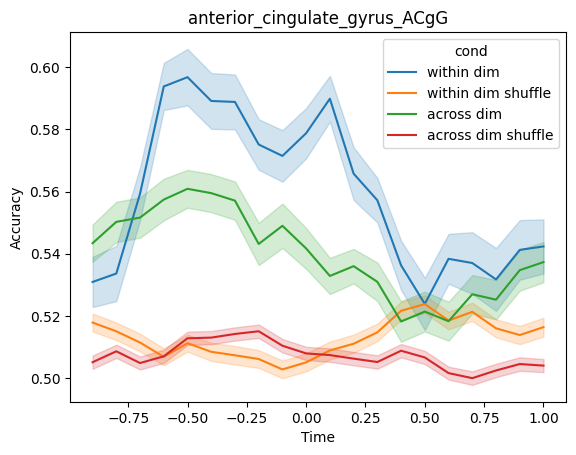

In [17]:
PAIRS_PATH = "/data/patrick_res/sessions/both/pairs_at_least_3blocks_10sess.pickle"
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)

for region in REGIONS_OF_INTEREST:
    args = argparse.Namespace(
        **BeliefPartitionConfigs()._asdict()
    )
    args.subject = "both"
    args.mode = "feat_belief"
    args.base_output_path = "/data/patrick_res/ccgp_conf"
    args.sig_unit_level = "pref_conf_99th_window_filter_drift"
    args.region_level = "structure_level2_cleaned"
    args.regions = region

    within_res = belief_partitions_io.read_ccgp_results(args, pairs[pairs.dim_type == "within dim"], conds=["across_cond"])
    within_res["cond"] = within_res.condition.apply(lambda x: "within dim shuffle" if "shuffle" in x else "within dim")
    across_res = belief_partitions_io.read_ccgp_results(args, pairs[pairs.dim_type == "across dim"], conds=["across_cond"])
    across_res["cond"] = across_res.condition.apply(lambda x: "across dim shuffle" if "shuffle" in x else "across dim")
    all_res = pd.concat((within_res, across_res))
    fig, ax = plt.subplots()
    sns.lineplot(all_res, x="Time", y="Accuracy", hue="cond", ax=ax, errorbar="se")
    ax.set_title(region)